In [1]:
from data_generation import GenerateData
from heuristic_model import HeuristicModel
from astar import Astar, DifferentialAstar
from sklearn.model_selection import train_test_split

In [2]:
inputs, heuristics = GenerateData.generate_training_data(num_samples=1000, grid_size=(20, 20))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(inputs, heuristics, test_size=0.2, random_state=42)
input_dim = X_train.shape[1]

In [4]:
from tensorflow.python.keras.engine import data_adapter

def _is_distributed_dataset(ds):
    return isinstance(ds, data_adapter.input_lib.DistributedDatasetSpec)

data_adapter._is_distributed_dataset = _is_distributed_dataset

In [5]:
heuristic_model = HeuristicModel.create_feed_forward_heuristic_model(input_dim)
heuristic_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25/25 [==============================] - 1s 19ms/step - loss: 99.5018 - mae: 7.9700 - val_loss: 54.9110 - val_mae: 6.0322
Epoch 2/10
25/25 [==============================] - 0s 12ms/step - loss: 46.7981 - mae: 5.5087 - val_loss: 32.9418 - val_mae: 4.6588
Epoch 3/10
25/25 [==============================] - 0s 15ms/step - loss: 30.5349 - mae: 4.4530 - val_loss: 23.4162 - val_mae: 3.9340
Epoch 4/10
25/25 [==============================] - 0s 15ms/step - loss: 15.9785 - mae: 3.1942 - val_loss: 13.9661 - val_mae: 2.9861
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 6.6211 - mae: 2.0314 - val_loss: 8.3011 - val_mae: 2.2828
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 2.6889 - mae: 1.3075 - val_loss: 5.7863 - val_mae: 1.9203
Epoch 7/10
25/25 [==============================] - 0s 12ms/step - loss: 1.4713 - mae: 0.9576 - val_loss: 4.7267 - val_mae: 1.7080
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 0.941

In [6]:
HeuristicModel.save_model(heuristic_model, 'feed_forward_n1000_s20x20_e10_bs32')

In [7]:
grid = inputs[0][0: 400].reshape((20, 20))
start_position = inputs[0][400: 402].tolist()
goal = inputs[0][402: 404].tolist()
print(grid, start_position, goal)
diff_astar = DifferentialAstar(grid, heuristic_model, goal, start_position)
astar = Astar(grid, goal_position=goal, starting_position=start_position)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.

In [8]:
diff_astar_path = diff_astar.find_path()
astar_path = astar.find_path()

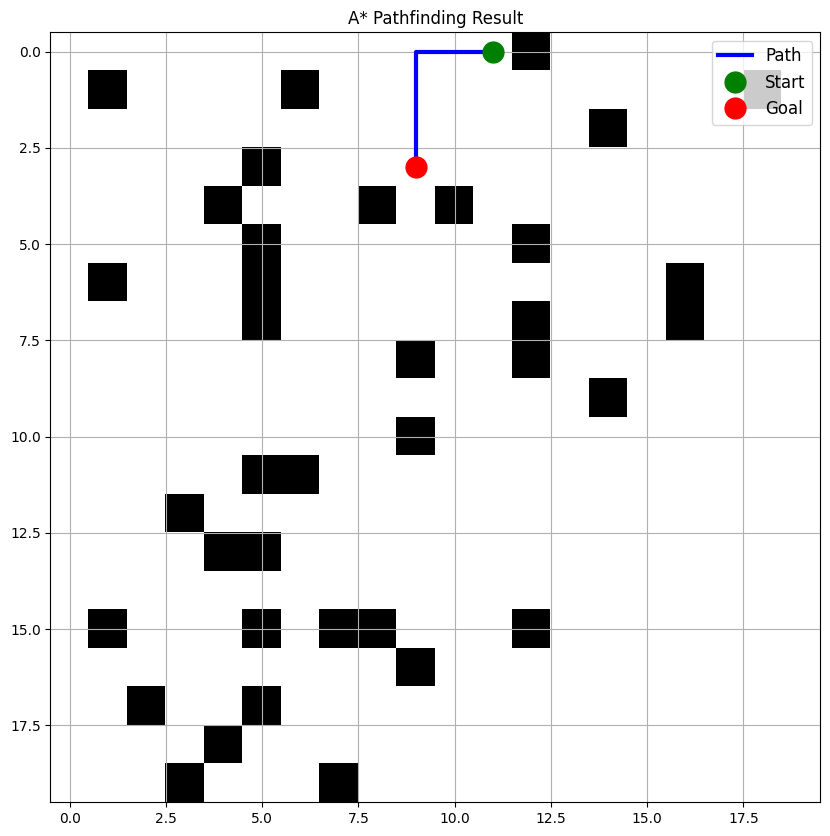

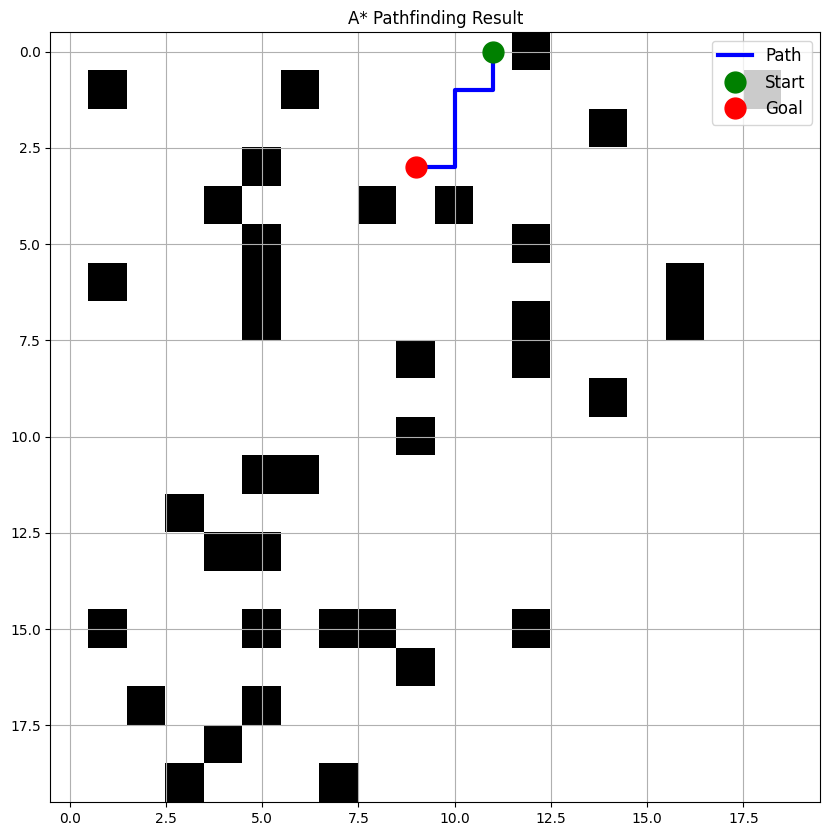

In [9]:
astar.visualize_path()
diff_astar.visualize_path()